# Python Übung 3 - Fehlermaße für Regression

In [1]:
import pandas as pd
import seaborn as sns

Laden der Zahlen aus Übung 1 (und plotten)

In [2]:
df = sns.load_dataset("anscombe")

Selektion eines der vier Datensätze

In [3]:
print(df)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [4]:
#df.loc[df['x']>8]
print(df.groupby("dataset").describe())
dataSet3 = df.loc[df["dataset"]=='III']

            x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50  


Linare Regression durchführen 

In [5]:
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

X = dataSet3.iloc[:, 1].values.reshape(-1, 1)  # numpy! 
Y = dataSet3.iloc[:, 2].values.reshape(-1, 1)  

reg = LinearRegression()  
reg.fit(X, Y) 
print(reg.score(X, Y) , " " , reg.coef_ , " " , reg.intercept_)

0.6663240410665592   [[0.49972727]]   [3.00245455]


Werte vorhersagen und einzeichnen

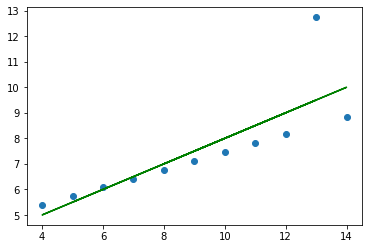

In [6]:
Y_pred = reg.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green')
plt.show()

In [7]:
#TODO

Aufgabe: 
1. Lesen Sie sich die Metrics durch. Siehe Link https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

2. Vergleichen Sie diese  mit denen aus der Vorlesung.

sklearn.metrics
    mean_absolute_error --> MAE
    mean_squared_error --> MSE
    mean_absolute_percentage_error --> MAPE
    r2_score --> R^2
    max_error --> MAX

3. Bewerten Sie die Trendlinien für alle vier Datensätze. Was schließen Sie daraus? 

In [8]:
datasets = [df.loc[df["dataset"]=='I'*i] for i in range(1, 4)] + [df.loc[df["dataset"]=='IV']]

In [9]:
regs = []
reshaped_data = []

for ds in datasets:
    X = ds.iloc[:, 1].values.reshape(-1, 1)  # numpy! 
    Y = ds.iloc[:, 2].values.reshape(-1, 1)  

    reg = LinearRegression()  
    reg.fit(X, Y) 
    regs.append(reg)
    reshaped_data.append([X, Y])

Score       |MAE         |MSE         |RMSE        |MAPE        |R^2         |MAX         
------------------------------------------------------------------------------------------
0.6665424595|0.8374049587|1.2511536364|1.1185497916|0.1212578348|0.6665424595|1.9212727273
0.6662420337|0.9679338843|1.2523900826|1.1191023557|0.1569518620|0.6662420337|1.9009090909
0.6663240411|0.7159669421|1.2505628926|1.1182856936|0.0797072761|0.6663240411|3.2410909091
0.6667072569|0.9027272727|1.2493172727|1.1177286221|0.1347384865|0.6667072569|1.8390000000


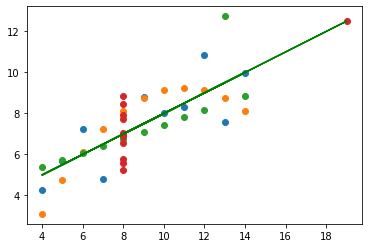

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, max_error
import math

print("{:12}|{:12}|{:12}|{:12}|{:12}|{:12}|{:12}".format("Score", "MAE", "MSE", "RMSE", "MAPE", "R^2", "MAX"))
print("-"*90)

for i, reg in enumerate(regs):
    X = reshaped_data[i][0]
    Y = reshaped_data[i][1]
    
    Y_pred = reg.predict(X)
    
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='green')
    
    print("{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}".format(
        reg.score(X, Y), 
        mean_absolute_error(Y, Y_pred),
        mean_squared_error(Y, Y_pred),
        math.sqrt(mean_squared_error(Y, Y_pred)),
        mean_absolute_percentage_error(Y, Y_pred),
        r2_score(Y, Y_pred),
        max_error(Y, Y_pred)
    ))
    
plt.show()

4. Löschen Sie einzelne Ausreißer und bewerten Sie erneut.

In [11]:
dataSet1 = df.loc[df["dataset"]=='I']
dataSet2 = df.loc[df["dataset"]=='II']
dataSet3 = df.loc[df["dataset"]=='III'].drop(24, axis=0)
dataSet4 = df.loc[df["dataset"]=='IV'].drop(40)

Score        | MAE          | MSE          | RMSE         | MAPE         | R^2          | MAX         
----------------------------------------------------------------------------------------------------
0.6665424595 | 0.8374049587 | 1.2511536364 | 1.1185497916 | 0.1212578348 | 0.6665424595 | 1.9212727273
0.6662420337 | 0.9679338843 | 1.2523900826 | 1.1191023557 | 0.1569518620 | 0.6662420337 | 1.9009090909
0.9999931076 | 0.0023116883 | 0.0000075974 | 0.0027563386 | 0.0003469281 | 0.9999931076 | 0.0050649351
0.0000000000 | 0.9930000000 | 1.3742490000 | 1.1722836687 | 0.1482123351 | 0.0000000000 | 1.8390000000


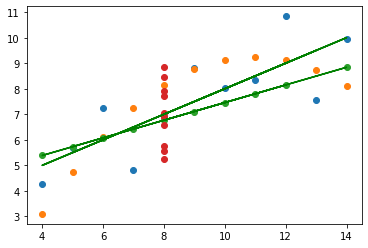

In [12]:
datasets_new = [dataSet1, dataSet2, dataSet3, dataSet4]

regs = []
reshaped_data = []

for ds in datasets_new:
    X = ds.iloc[:, 1].values.reshape(-1, 1)  # numpy! 
    Y = ds.iloc[:, 2].values.reshape(-1, 1)  

    reg = LinearRegression()  
    reg.fit(X, Y) 
    regs.append(reg)
    reshaped_data.append([X, Y])

print("{:12} | {:12} | {:12} | {:12} | {:12} | {:12} | {:12}".format("Score", "MAE", "MSE", "RMSE", "MAPE", "R^2", "MAX"))
print("-"*100)

for i, reg in enumerate(regs):
    X = reshaped_data[i][0]
    Y = reshaped_data[i][1]
    
    Y_pred = reg.predict(X)
    
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='green')
    
    print("{:1.10f} | {:1.10f} | {:1.10f} | {:1.10f} | {:1.10f} | {:1.10f} | {:1.10f}".format(
        reg.score(X, Y), 
        mean_absolute_error(Y, Y_pred),
        mean_squared_error(Y, Y_pred),
        math.sqrt(mean_squared_error(Y, Y_pred)),
        mean_absolute_percentage_error(Y, Y_pred),
        r2_score(Y, Y_pred),
        max_error(Y, Y_pred)
    ))
    
plt.show()

5. Was ist das Trainings- und Testset in der Übung hier? Wie sollte es eigentlich sein? 

Hier: Trainings- und Testset ist das gleiche Set \
Eigentlich: Unterschiedliches Set für Training und Test mit 80/20 verteilung

6. Verwenden Sie ein anderes Regressionsverfahren und prüfen Sie, ob es besser ist!

In [13]:
from sklearn.linear_model import Lasso

regs_new = []
reshaped_data_new = []

for ds in datasets_new:
    X = ds.iloc[:, 1].values.reshape(-1, 1)  # numpy! 
    Y = ds.iloc[:, 2].values.reshape(-1, 1)  

    reg = Lasso()  
    reg.fit(X, Y) 
    regs_new.append(reg)
    reshaped_data_new.append([X, Y])

Score       |MAE         |MSE         |RMSE        |MAPE        |R^2         |MAX         
------------------------------------------------------------------------------------------
0.6398904536|0.9116033058|1.3511536364|1.1623913439|0.1350050942|0.6398904536|2.1388181818
0.6395923524|0.9990082645|1.3523900826|1.1629230768|0.1724582337|0.6395923524|2.4009090909
0.9018105083|0.2813722944|0.1082327056|0.3289873943|0.0414025649|0.9018105083|0.5833116883
0.0000000000|0.9930000000|1.3742490000|1.1722836687|0.1482123351|0.0000000000|1.8390000000


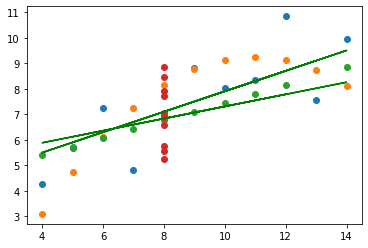

In [14]:
print("{:12}|{:12}|{:12}|{:12}|{:12}|{:12}|{:12}".format("Score", "MAE", "MSE", "RMSE", "MAPE", "R^2", "MAX"))
print("-"*90)

for i, reg in enumerate(regs_new):
    X = reshaped_data_new[i][0]
    Y = reshaped_data_new[i][1]
    
    Y_pred = reg.predict(X)
    
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='green')
    
    print("{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}|{:1.10f}".format(
        reg.score(X, Y), 
        mean_absolute_error(Y, Y_pred),
        mean_squared_error(Y, Y_pred),
        math.sqrt(mean_squared_error(Y, Y_pred)),
        mean_absolute_percentage_error(Y, Y_pred),
        r2_score(Y, Y_pred),
        max_error(Y, Y_pred)
    ))
    
plt.show()